In [6]:
import matplotlib.pyplot as plt
from skimage.util import compare_images
from matplotlib.gridspec import GridSpec
import cv2

from utils import rgb_svd_decomposition
from skimage.color import rgb2gray

In [2]:
img_2020 = cv2.imread('donnees/BDORTHO/ORTHOHR_1-0_RVB-0M20_JP2-E080_LAMB93_D035_2020-01-01/ORTHOHR/1_DONNEES_LIVRAISON_2021-06-00121/OHR_RVB_0M20_JP2-E080_LAMB93_D35-2020/35-2020-0305-6780-LA93-0M20-E080.jp2')
img_2020_resized = cv2.resize(img_2020, (10000, 10000), interpolation=cv2.INTER_AREA)[:288, :288]

In [3]:
img_2012_resized = cv2.imread('donnees/BDORTHO/BDORTHO_2-0_RVB-0M50_JP2-E080_LAMB93_D035_2012-01-01/BDORTHO/1_DONNEES_LIVRAISON_2015-02-00365/BDO_RVB_0M50_JP2-E080_LAMB93_D35-2012/35-2012-0305-6780-LA93-0M50-E080.jp2')[:288, :288]

In [8]:
gray_img_2020_resized = rgb2gray(img_2020_resized)
gray_img_2012_resized = rgb2gray(img_2012_resized)

In [9]:
import numpy as np
# https://stackoverflow.com/questions/32655686/histogram-matching-of-two-images-in-python-2-x
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)


In [12]:
from matplotlib import pyplot as plt

def ecdf(x):
    """convenience function for computing the empirical CDF"""
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

In [25]:
source_r = img_2020_resized[:,:,0]
template_r = img_2012_resized[:,:,0]
matched_r = hist_match(source_r, template_r)

source_g = img_2020_resized[:,:,1]
template_g = img_2012_resized[:,:,1]
matched_g = hist_match(source_g, template_g)

source_b = img_2020_resized[:,:,2]
template_b = img_2012_resized[:,:,2]
matched_b = hist_match(source_b, template_b)

In [28]:
color_comp = np.zeros((np.array(img_2020_resized).shape[0], np.array(img_2020_resized).shape[1], 3))
color_comp[:, :, 0] = matched_r
color_comp[:, :, 1] = matched_g
color_comp[:, :, 2] = matched_b

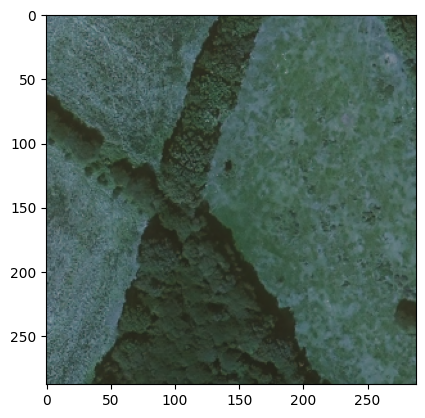

In [32]:
plt.imshow(img_2020_resized)

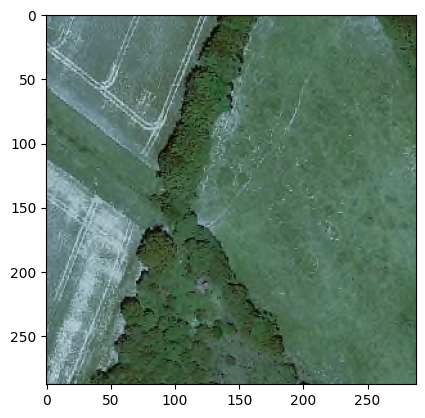

In [31]:
plt.imshow(img_2012_resized)

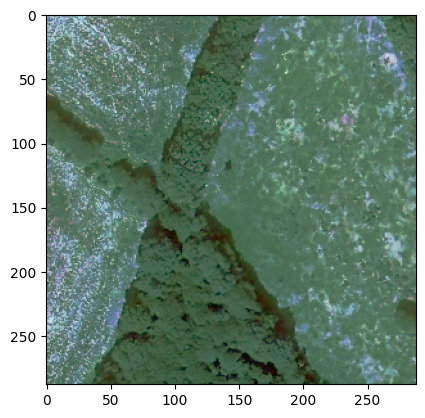

In [30]:
plt.imshow(color_comp/255.)

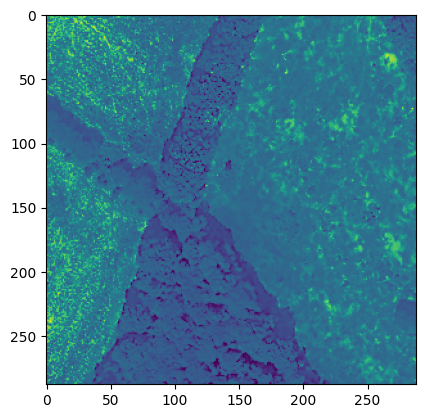

In [23]:
plt.imshow(matched_r)